<a href="https://colab.research.google.com/github/munich-ml/MLPy2021/blob/main/13_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

- By convention the actual plot libraty `matplotlib.pyplot` is importet as **`plt`**.
- For global settings, `matplotlib` altogether may be imported as **`mpl`**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['axes.titlesize'] = 15
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 13

# Inline plots

The **magic command `%matplotlib`** controlls the plot output. Normally, it is set to `inline`.

In [3]:
%matplotlib inline

# Plot to interactive Qt console

In [4]:
try:
    #import qtconsole
    from IPython import qt
    %matplotlib qt

except Exception as e:
    print(e)

else:
    x = np.arange(-1, 1.5, 0.01)
    plt.plot(x, np.power(x, 2), "o-")
    plt.grid(), plt.show()

Failed to import any qt binding


/usr/local/lib/python3.7/dist-packages/IPython/qt.py:13: ShimWarning: The `IPython.qt` package has been deprecated since IPython 4.0. You should import from qtconsole instead.
  "You should import from qtconsole instead.", ShimWarning)


Switch back to inline for the rest of this notebook:

In [5]:
%matplotlib inline

# Create plots

Firstly we'll define a function (`plot_example_funcs`) and then custmize it further.

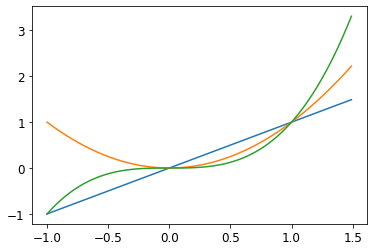

In [6]:
def plot_example_funcs():
    x = np.arange(-1, 1.5, 0.01)
    for exp in range(1, 4):
        plt.plot(x, np.power(x, exp), "-", label="$f(x)=x^{}$".format(exp))
    
plot_example_funcs()

## Add grid lines

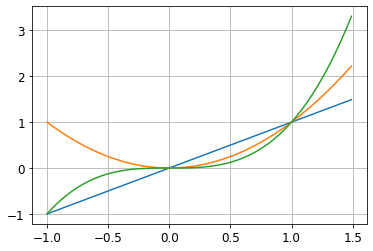

In [7]:
plot_example_funcs()
plt.grid();

## Add a legend

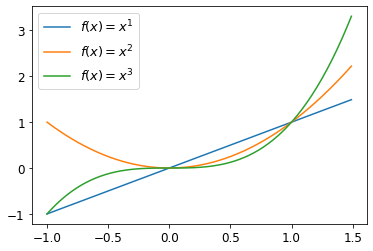

In [8]:
plot_example_funcs()
plt.legend();

## Set X and Y limits

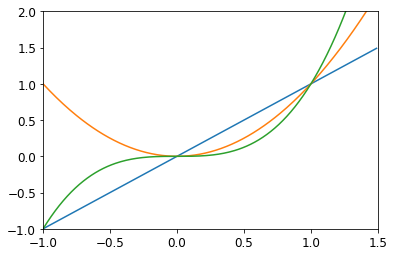

In [9]:
plot_example_funcs()
plt.xlim([-1, 1.5]), plt.ylim([-1, 2]);

## Set X and Y labels

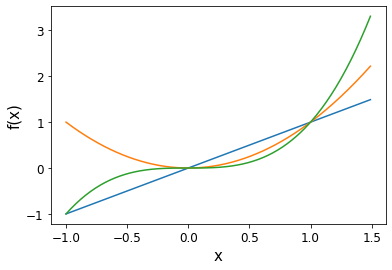

In [10]:
plot_example_funcs()
plt.xlabel("x"), plt.ylabel("f(x)");

## Define a figure size


The figure size has to be set, when creating the figure with `plt.figure()`.

Additionally, `plt.tight_layout()` should always be set, in order to use the complete plotting area.

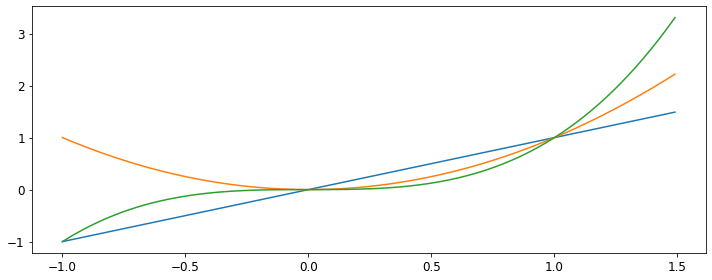

In [11]:
plt.figure(figsize=([10, 4]))
plot_example_funcs()
plt.tight_layout();

## The complete plot


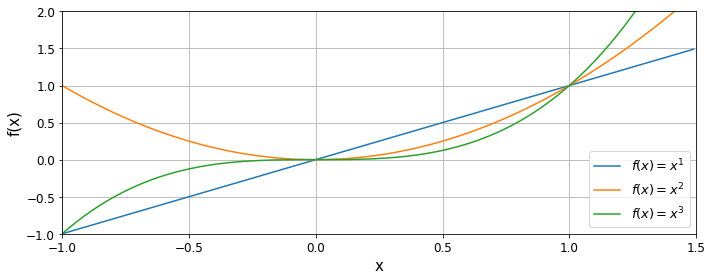

In [12]:
plt.figure(figsize=([10, 4]))
plot_example_funcs()
plt.xlim([-1, 1.5]), plt.ylim([-1, 2])
plt.xlabel("x"), plt.ylabel("f(x)")
plt.grid(), plt.legend(), plt.tight_layout();

# Interactivity in Jupyter Notebooks

Additional imports are required:

In [13]:
from ipywidgets import interact
from ipykernel.pylab.backend_inline import flush_figures

In order to add interactivity, the actual plotting function must have parameters. 

In [14]:
def plot_interactive_func(show_reference=True, exp=2, style="-"):
    x = np.arange(-1, 1.5, 0.1)
    plt.plot(x, np.power(x, exp), style, label="$f(x)=x^{}$".format(exp))
    if show_reference:
        plt.plot(x, x, "-", label="reference")
    plt.grid(), plt.legend(), plt.tight_layout()
    flush_figures()

The interactivity widget depends on the type of the input

- `bool` --> checkbox
- `int` --> slider
- `list` or `dict` --> combobox

In [15]:
interact(plot_interactive_func, show_reference=False, 
                                exp=(1, 5, 1), 
                                style=["-", ".", "o-"]);

interactive(children=(Checkbox(value=False, description='show_reference'), IntSlider(value=2, description='exp…

# Appendix

## [Matplotlib Cheat Sheet](https://github.com/munich-ml/MLPy2021/blob/main/cheat_sheets/Matplotlib_cheat_sheet.pdf) 

or find many examples on the [Matplotlib website](https://matplotlib.org/)

## `fig` and `ax` objects


In [16]:
x = np.arange(-1, 1.5, 0.01)
y = np.power(x, 3)

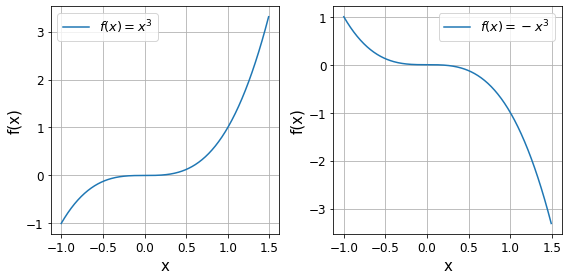

In [17]:
fig = plt.figure(figsize=[8, 4]) 
axes = fig.subplots(nrows=1, ncols=2)
axes[0].plot(x, y, label="$f(x)=x^3$")
axes[1].plot(x, -y, label="$f(x)=-x^3$")
for ax in axes:
    ax.grid(which="both")
    ax.legend()
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")
fig.tight_layout()

## Styles

E.g. switch to **dark** for usage in **dark theme** IDEs

`plt.style.use('dark_background')`

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

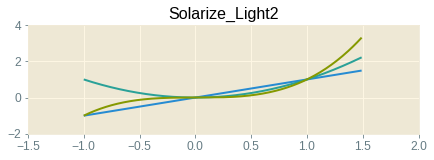

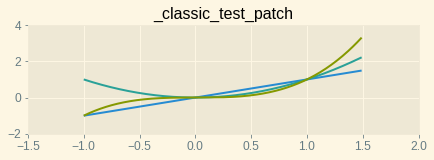

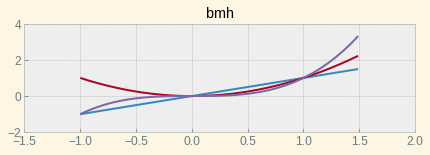

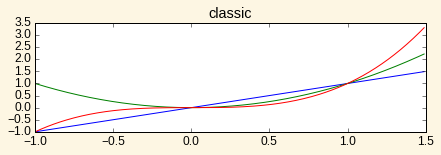

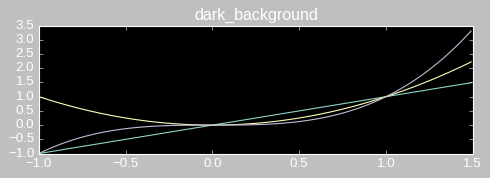

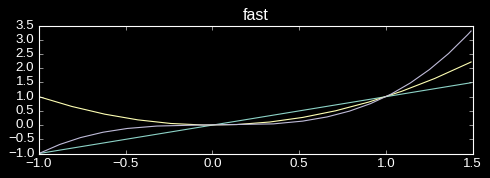

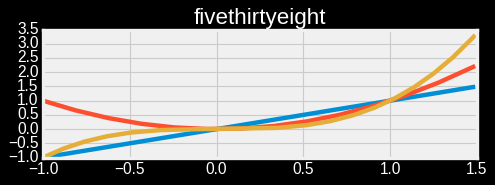

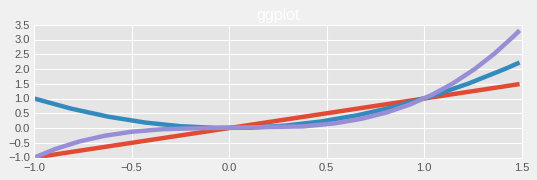

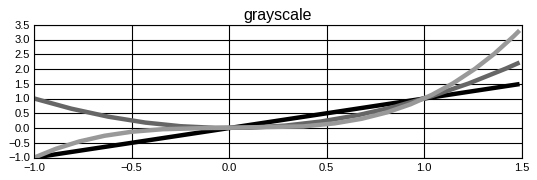

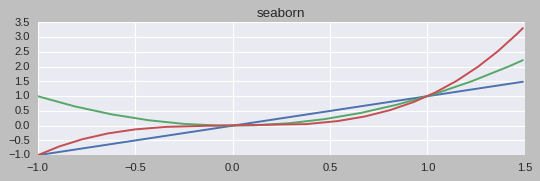

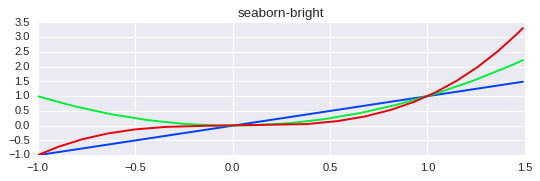

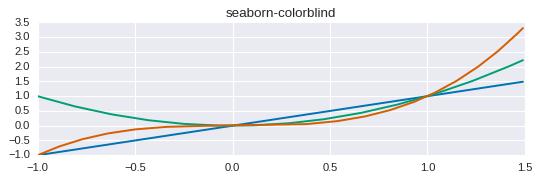

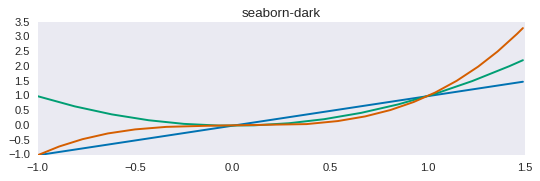

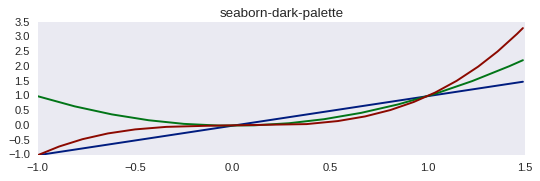

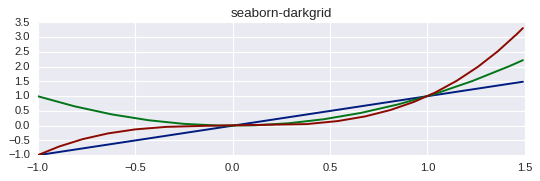

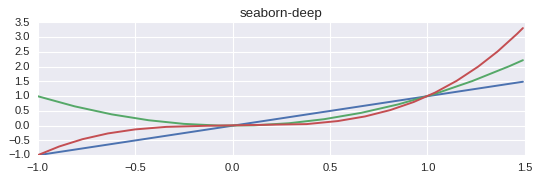

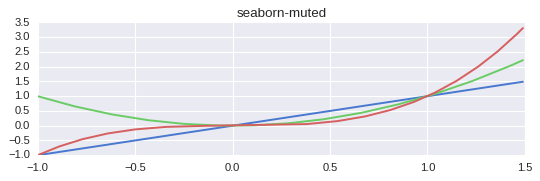

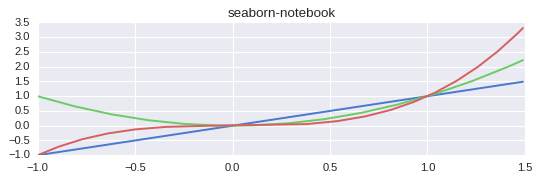

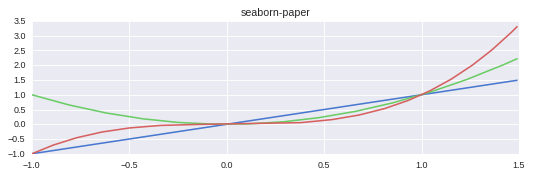

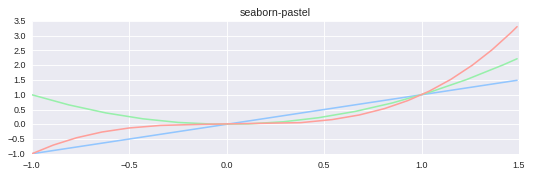

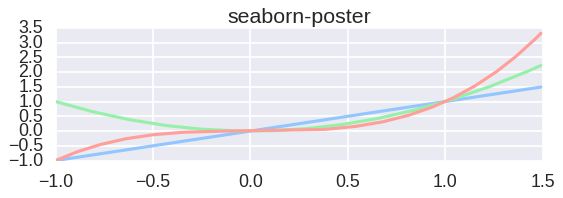

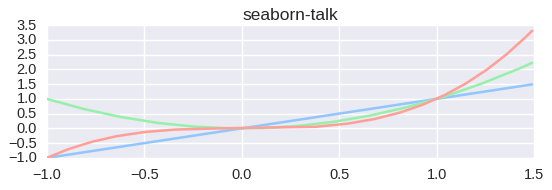

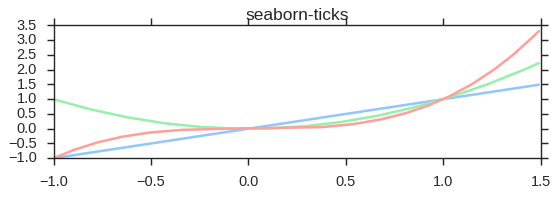

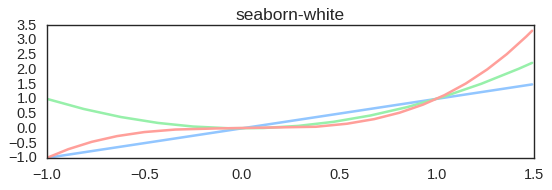

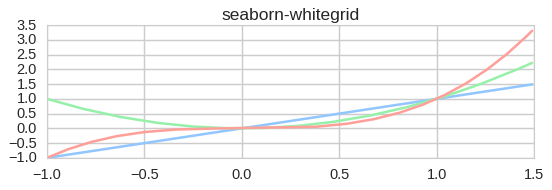

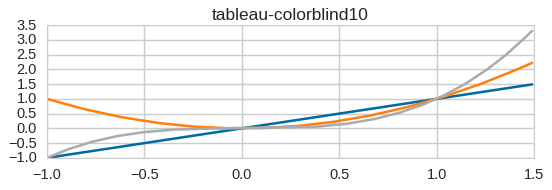

In [18]:
for style in plt.style.available:
    plt.figure(figsize=(7,2))
    plt.style.use(style)
    plot_example_funcs()
    plt.title(style);